# IMPORT DATASET

Dataset menggunakan sumber dari kaggle.com
link: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [58]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhia1999/chronic-kidney-disease")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/abhia1999/chronic-kidney-disease/versions/2


In [59]:
import os
print("Files in dataset directory:", os.listdir(path))

Files in dataset directory: ['new_model.csv']


# EDA

In [60]:
import pandas as pd

df = pd.read_csv(path + '/new_model.csv')
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [61]:
df.shape

(400, 14)

In [62]:
df.dtypes

,0
Bp,float64
Sg,float64
Al,float64
Su,float64
Rbc,float64
Bu,float64
Sc,float64
Sod,float64
Pot,float64
Hemo,float64



Columns description¶

    Bp - Blood Pressure
    Sg - Specific Gravity
    Al - Albumin
    Su - Sugar
    Rbc - Red Blood Cell
    Bu - Blood Urea
    Sc - Serum Creatinine
    Sod - Sodium
    Pot - Pottasium
    Hemo - Hemoglobin
    Wbcc - White Blood Cell Count
    Rbcc - Red Blood Cell Count
    Htn - Hypertension
    Class - Predicted Class



In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [64]:
df.isnull().sum()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0
Bu,0
Sc,0
Sod,0
Pot,0
Hemo,0


In [65]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


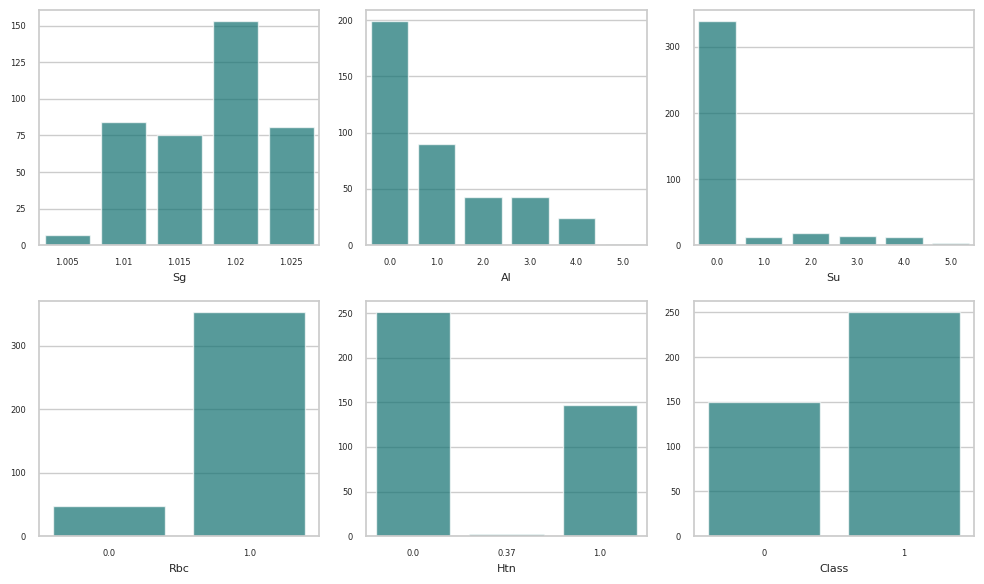

In [66]:
categorical_columns = ['Sg', 'Al', 'Su', 'Rbc', 'Htn', 'Class']

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
for i, cat_var in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=cat_var, color='Teal', alpha=0.7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(cat_var, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

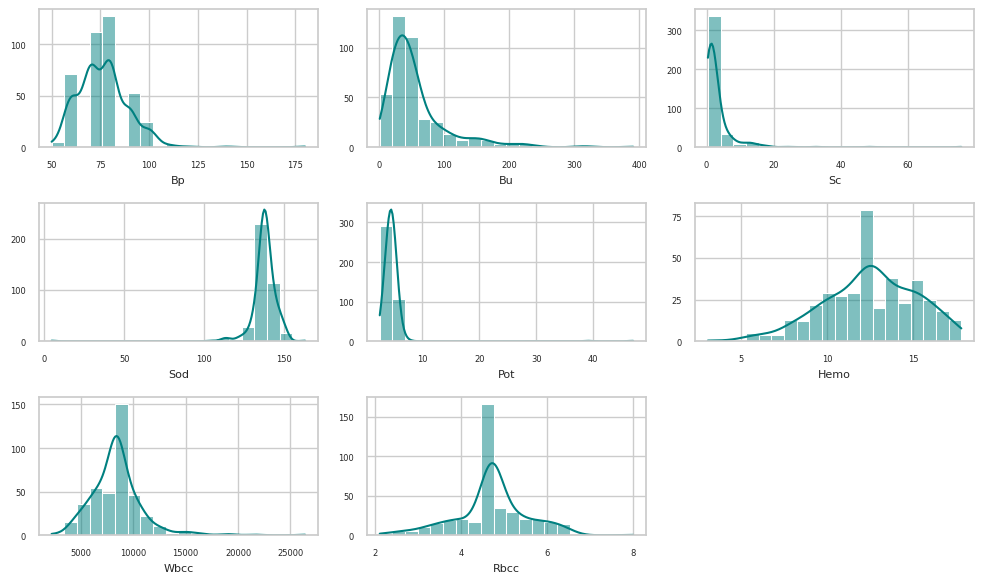

In [67]:
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, kde=True, bins=20, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

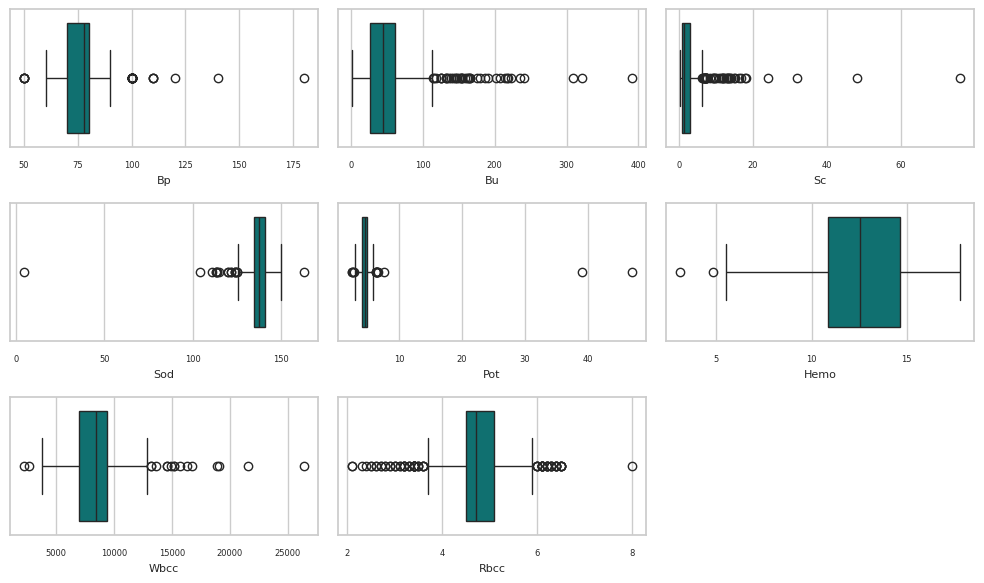

In [68]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=
                df, x=var, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Correlation

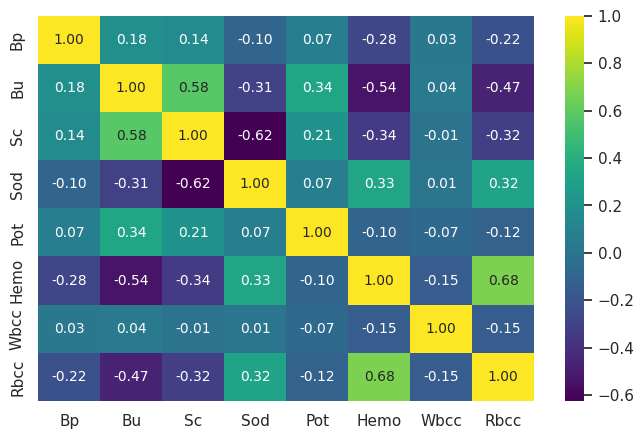

In [69]:
corr_df = df[['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']]
corr_matrix = corr_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

# Preprocessing Data

In [70]:
#Transformation of numerical_columns to categorical
categorical_df = pd.DataFrame()
bins = 5

for column in numerical_columns:
    transformed_data = pd.cut(df[column], bins=bins, labels=False)
    categorical_df[f'{column}_c'] = transformed_data

df = pd.concat([df, categorical_df], axis=1)
df.drop(columns=numerical_columns, inplace=True)

In [71]:
df.head()

,Sg,Al,Su,Rbc,Htn,Class,Bp_c,Bu_c,Sc_c,Sod_c,Pot_c,Hemo_c,Wbcc_c,Rbcc_c
0,1.020,1.0,0.0,1.0,1.0,1,1,0,0,4,0,4,1,2
1,1.020,4.0,0.0,1.0,0.0,1,0,0,0,4,0,2,0,2
2,1.010,2.0,3.0,1.0,0.0,1,1,0,0,4,0,2,1,2
3,1.005,4.0,0.0,1.0,1.0,1,0,0,0,3,0,2,0,1
4,1.010,2.0,0.0,1.0,0.0,1,1,0,0,4,0,2,1,2


In [72]:
df['Class'].value_counts()

,count
Class,
1,250
0,150


Class :
- 0: No Chronic Kidney Disease
- 1: Chronic Kidney Disease

# Naive Bayes Model

In [73]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [74]:
target = df['Class']
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), target, test_size=0.3, random_state=42)

In [78]:
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train, y_train)
y_pred = categorical_nb.predict(X_test)

# Model Evaluation

In [76]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metrics':['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values' :[accuracy, precision, recall, f1]
})
metrics_df

,Metrics,Values
0,Accuracy,0.958333
1,Precision,0.986301
2,Recall,0.947368
3,F1,0.966443


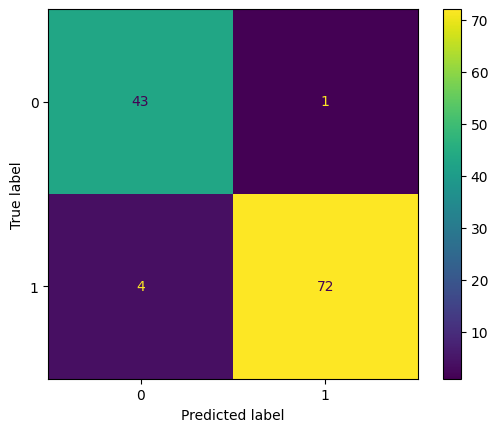

In [77]:
sns.reset_orig()
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categorical_nb.classes_).plot()